<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex4_1_cnn_mnist_cl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

TensorFlow 2.x selected.


In [0]:
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)


def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()


def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 90us/sample - loss: 0.2387 - accuracy: 0.9274 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 2/10
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0856 - accuracy: 0.9746 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 3/10
48000/48000 [==============================] - 2s 52us/sample - loss: 0.0643 - accuracy: 0.9812 - val_loss: 0.0434 - val_accuracy: 0.9868
Epoch 4/10
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0424 - val_accuracy: 0.9880
Epoch 5/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0472 - accuracy: 0.9856 - val_loss: 0.0475 - val_accuracy: 0.9884
Epoch 6/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0417 - accuracy: 0.9878 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 7/10
48000/48000 [==============================] 

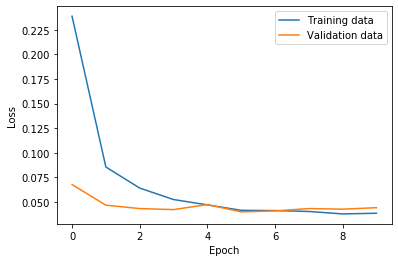

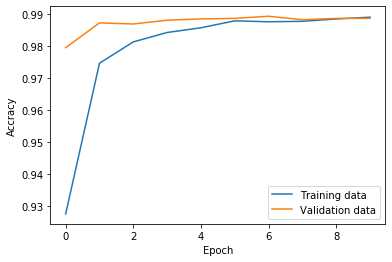

In [3]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])


class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if keras.backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test


def main():
    batch_size = 128
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

if __name__ == '__main__':
    main()